In [36]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
train_ds, test_ds = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)

In [38]:
train_data = []
train_labels = []

for example, label in train_ds:
  train_data.append(example.numpy().decode('utf-8'))
  train_labels.append(label.numpy())

test_data = []
test_labels = []

for example, label in test_ds:
  test_data.append(example.numpy().decode('utf-8'))
  test_labels.append(label.numpy())

In [39]:
train_data = np.asarray(train_data)
train_labels = np.asarray(train_labels)
test_data = np.asarray(test_data)
test_labels = np.asarray(test_labels)

In [40]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [41]:
import random

i = random.randint(0, len(train_data))

print(train_data[i])
print(train_labels[i])

Spoilers Following: I picked up the book "Evil Angels" when it first came out knowing nothing of the case. Just to give the press and the Austrialian people a break here, I was quite far into it before I began to question the Chamberlain's guilt. The author obviously intended the reader to understand why the public jumped to the conclusions they did. John Bryson told the story just as it was presented to the jurors (and picked up by the press) of the arterial spray, the actelone (??) plates, Dr. James Cameron's certainty that the collar was cut with scissors, that a baby could not be taken whole from her clothes with the buttons still done up, bloody hand print, etc. all quite convincingly. After all, these were experts in their fields who were testifying with no apparent reason to lie, and the fact that the evidence was completely wrong wasn't apparent to me at all. It was also highly technical evidence, difficult for a layman to understand. To this point, beyond some hearsay testimon

In [42]:
vocab_size = 10000
embedding_dim = 16
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

In [44]:
tokenizer.fit_on_texts(train_data)
tokenizer.fit_on_texts(test_data)
word_index = tokenizer.word_index
train_data = tokenizer.texts_to_sequences(train_data)
test_data = tokenizer.texts_to_sequences(test_data)

In [45]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                           maxlen=max_length,
                                                           padding='post')

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                          maxlen=max_length,
                                                          padding='post')

In [47]:
print(len(train_data[0]))
print(len(test_data[0]))

200
200


In [48]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.97:
      print('97% accuracy reached, stopping training.')
      self.model.stop_training = True
  
callback = MyCallback()

In [51]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels),
                    callbacks=[callback])

Epoch 1/10
782/782 [==============================] - 302s 379ms/step - loss: 0.6356 - accuracy: 0.6179 - val_loss: 0.6529 - val_accuracy: 0.6151
Epoch 2/10
782/782 [==============================] - 298s 381ms/step - loss: 0.4676 - accuracy: 0.7782 - val_loss: 0.5701 - val_accuracy: 0.7341
Epoch 3/10
782/782 [==============================] - 298s 381ms/step - loss: 0.3336 - accuracy: 0.8606 - val_loss: 0.3780 - val_accuracy: 0.8465
Epoch 4/10
782/782 [==============================] - 297s 380ms/step - loss: 0.2275 - accuracy: 0.9163 - val_loss: 0.3366 - val_accuracy: 0.8685
Epoch 5/10
782/782 [==============================] - 299s 382ms/step - loss: 0.1839 - accuracy: 0.9342 - val_loss: 0.3296 - val_accuracy: 0.8708
Epoch 6/10
782/782 [==============================] - 303s 388ms/step - loss: 0.1426 - accuracy: 0.9538 - val_loss: 0.3689 - val_accuracy: 0.8636
Epoch 7/10
782/782 [==============================] - 303s 388ms/step - loss: 0.1106 - accuracy: 0.9664 - val_loss: 0.4083 -

In [52]:
def plot(history, metric):
  plt.plot(history.history[metric], label=metric)
  plt.plot(history.history['val_'+metric], label='val_'+metric)
  plt.title(metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend()

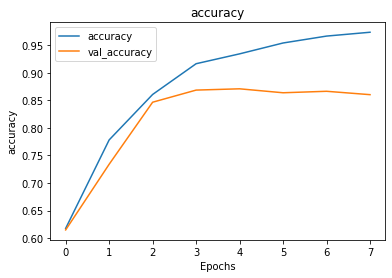

In [53]:
plot(history=history, metric='accuracy')

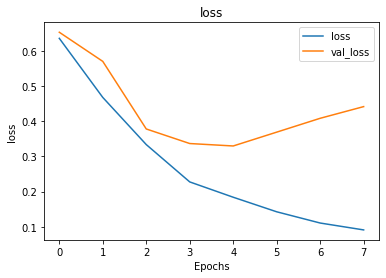

In [54]:
plot(history=history, metric='loss')